### Proyecto Fase 1 - (Análisis Exploratorio e Ingeniería e Características)

#### Héctor Evelio Fajardo Jiménez 18001842
#### Ana Marcela Bethancourt Vargas 09000253

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
datasett = pd.read_csv("datapf1.csv")
datasett.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [20]:
# Revisar columnas
print(datasett.head())

# Identificar columnas
columns = datasett.columns

# Variables a predecir
print(columns)

# Viariable a predecir
y = datasett['GDP']

# Variables predictoras
X = datasett.drop(['GDP'], axis=1)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

#### Sepración de variables

In [21]:
X = datasett.drop(['GDP'], axis=1)  # Variables predictoras
y = datasett['GDP']  # Variable a predecir

#### División de conjuntos de entrenamiento y pruebas

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
# df = pd.read_csv('ruta/al/conjunto/de/datos.csv')

# Separar las variables predictoras y la variable a predecir
X = datasett.drop(['Target'], axis=1)
y = datasett['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7604519774011299


### Imputación de variables

In [30]:
numeric_columns = datasett.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    datasett[col].fillna(datasett[col].median(), inplace=True)

### Variables categóricas

In [31]:
categorical_columns = datasett.select_dtypes(include=['object']).columns

for col in categorical_columns:
    datasett[col].fillna(datasett[col].mode()[0], inplace=True)

### Varaibles categóricas a numéricas

In [33]:
dataset = pd.get_dummies(datasett, drop_first=True)

### Transforamción logaritmicas 

In [34]:
import numpy as np

# Transformación logarítmica para variables numéricas seleccionadas (si es necesario)
for col in numeric_columns:
    datasett[col] = np.log1p(datasett[col])  # log1p es log(1 + x), que maneja valores cero correctamente

C:\Users\Administrador\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Tratamiento de outlier

In [35]:
# Tratamiento de outliers usando IQR
for col in numeric_columns:
    Q1 = datasett[col].quantile(0.25)
    Q3 = datasett[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset = datasett[(datasett[col] >= lower_bound) & (datasett[col] <= upper_bound)]

#### Estandarización de variables

In [36]:
from sklearn.preprocessing import StandardScaler

# Estandarización de variables numéricas
scaler = StandardScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

C:\Users\Administrador\AppData\Local\Temp\ipykernel_12460\1312132627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])


### Revisón de dataset

In [37]:
print(dataset.head())

   Marital status  Application mode  Application order    Course  \
0       -0.303251          0.467979           2.244129 -4.060570   
1       -0.303251          0.379524          -0.629206  0.230417   
2       -0.303251         -1.182148           2.244129  0.208796   
4        1.867499          1.067663          -0.629206  0.075539   
9       -0.303251         -1.182148          -0.629206  0.228554   

   Daytime/evening attendance  Previous qualification  \
0                    0.342608               -0.400859   
1                    0.342608               -0.400859   
2                    0.342608               -0.400859   
4                   -2.918784               -0.400859   
9                    0.342608               -0.400859   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.746901    -0.162597                0.446989   
1                        1.994472    -0.162597               -1.414685   
2                       -0

## Gráficos 

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Histograma

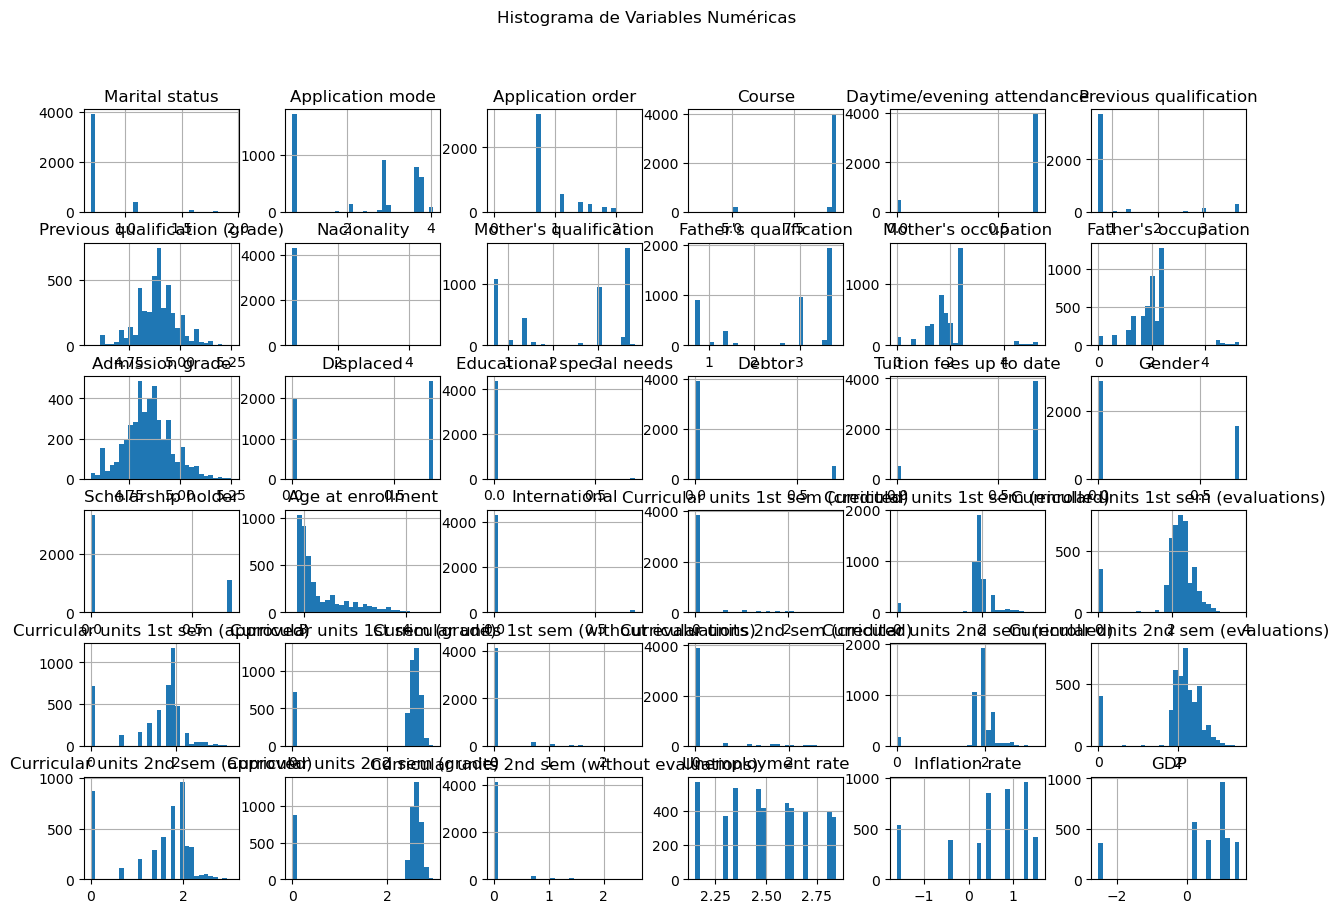

In [39]:
datasett.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograma de Variables Numéricas")
plt.show()

#### Boxplot

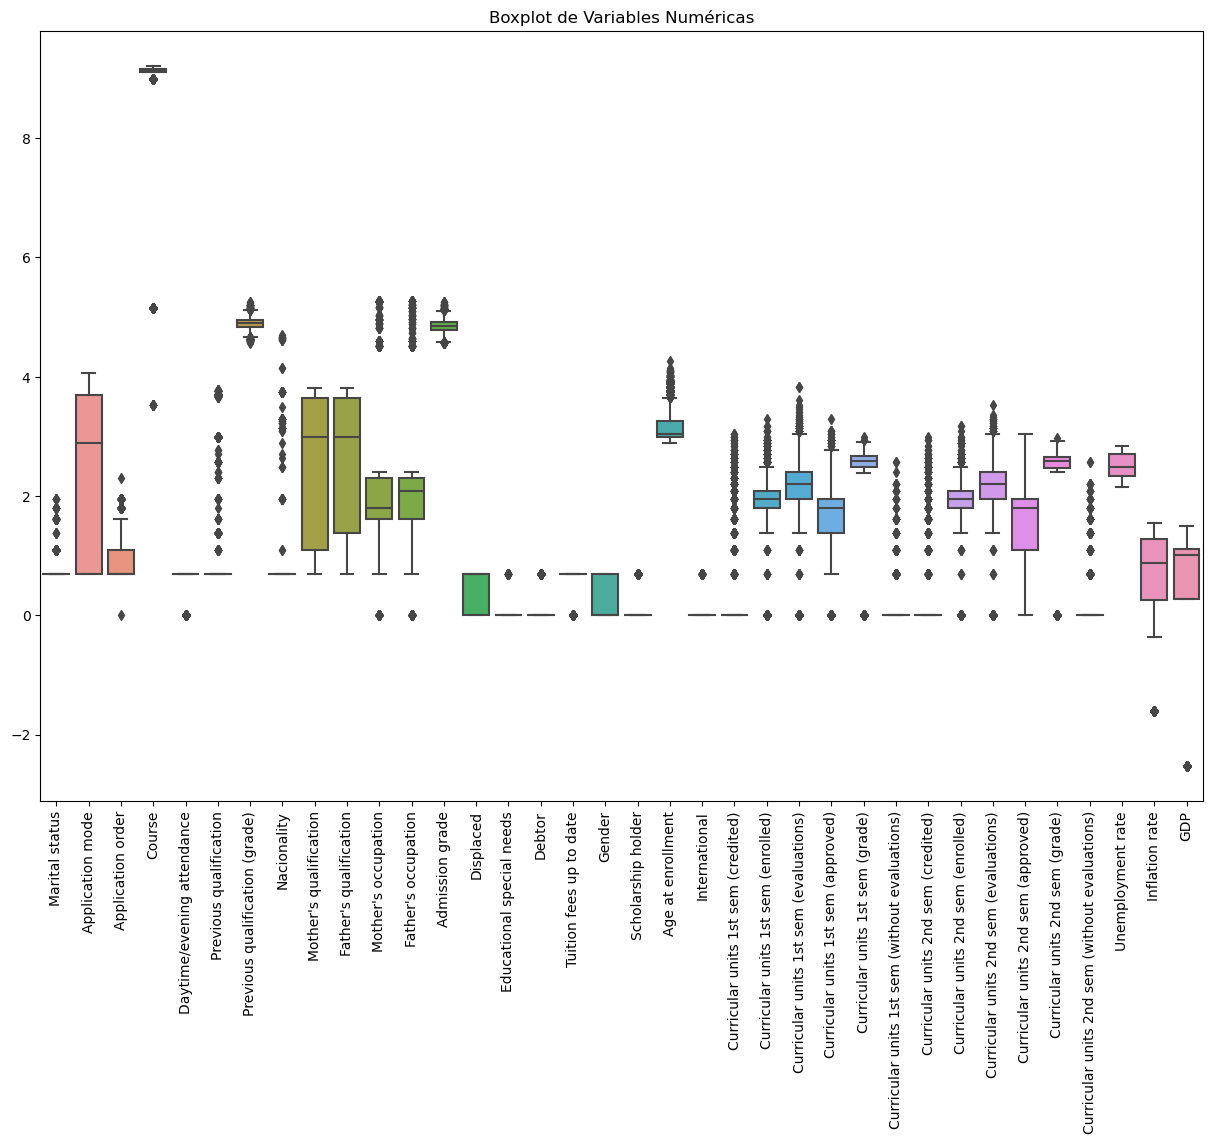

In [40]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=datasett[numeric_columns])
plt.title("Boxplot de Variables Numéricas")
plt.xticks(rotation=90)
plt.show()

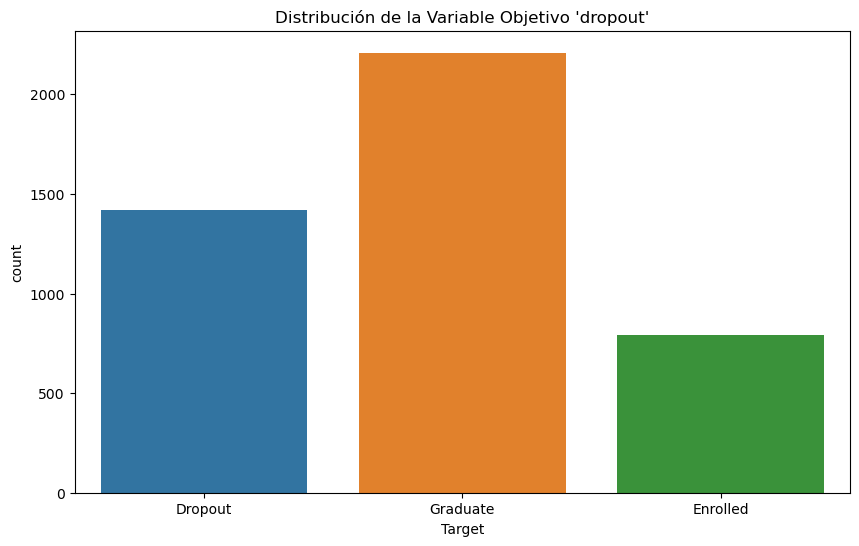

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=datasett)  # Usa el DataFrame original si 'dropout' no fue codificado
plt.title("Distribución de la Variable Objetivo 'dropout'")
plt.show()

#### Pairplot

In [47]:
sns.pairplot(datasett[numeric_columns])
plt.suptitle("Pairplot de Variables Numéricas")
plt.show()

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
